In [0]:
import keras

keras.__version__

Using TensorFlow backend.


'2.2.5'

載入boston_housing資料集

In [0]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


輸出train_data的形狀

In [0]:
train_data.shape

(404, 13)

輸出test_data的形狀

In [0]:
test_data.shape

(102, 13)


As you can see, we have 404 training samples and 102 test samples. The data comprises 13 features. The 13 features in the input data are as 
follow:

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

The targets are the median values of owner-occupied homes, in thousands of dollars:

輸出train_targets

In [0]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13


The prices are typically between \$10,000 and \$50,000. If that sounds cheap, remember this was the mid-1970s, and these prices are not 
inflation-adjusted.

## Preparing the data
標準化train_data, test_data

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [0]:
mean #

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [0]:
std #

## Building our network
使用mse來compile神經網路, 訓練時期用MAE

In [0]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

## Validating our approach using K-fold validation

In [0]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
all_scores

[2.4086508750915527, 2.511606216430664, 2.8775851726531982, 2.263976812362671]

In [0]:
np.mean(all_scores)

2.5154547691345215

跑500個epochs

In [0]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_loss']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
mae_history

[51.81002426147461,
 33.37287902832031,
 26.184162139892578,
 23.042022705078125,
 24.139007568359375,
 19.6008243560791,
 20.621570587158203,
 18.111591339111328,
 16.324771881103516,
 16.864770889282227,
 18.629026412963867,
 15.398390769958496,
 14.596395492553711,
 13.666394233703613,
 16.777372360229492,
 15.686992645263672,
 14.080517768859863,
 15.207003593444824,
 13.893110275268555,
 13.263229370117188,
 16.237918853759766,
 12.73841381072998,
 12.160579681396484,
 11.3408842086792,
 11.46981143951416,
 13.880163192749023,
 13.541473388671875,
 12.109877586364746,
 11.568766593933105,
 12.546907424926758,
 12.036831855773926,
 12.154729843139648,
 12.180795669555664,
 11.515517234802246,
 11.58200740814209,
 11.21104621887207,
 12.93188190460205,
 12.61546802520752,
 12.549797058105469,
 11.785239219665527,
 11.837724685668945,
 11.993902206420898,
 13.297245025634766,
 11.350168228149414,
 11.65786361694336,
 12.15451431274414,
 12.467633247375488,
 11.294442176818848,
 11.61

In [0]:
len(mae_history)

500

In [0]:
type(mae_history)

list

In [0]:
all_mae_histories

[[32.88846969604492,
  21.241167068481445,
  21.27593231201172,
  17.069419860839844,
  13.19020938873291,
  11.588220596313477,
  11.971962928771973,
  13.711051940917969,
  10.881848335266113,
  11.27814769744873,
  12.587751388549805,
  9.606693267822266,
  11.6063232421875,
  10.959232330322266,
  8.92549991607666,
  12.666014671325684,
  9.465469360351562,
  11.679659843444824,
  10.101496696472168,
  9.258151054382324,
  9.291524887084961,
  8.768601417541504,
  9.626462936401367,
  7.693589687347412,
  8.791354179382324,
  8.922677040100098,
  7.8812255859375,
  8.668586730957031,
  7.174738883972168,
  7.81459379196167,
  8.89775562286377,
  8.44043254852295,
  7.551592826843262,
  7.995884895324707,
  8.688350677490234,
  8.114197731018066,
  7.803734302520752,
  8.360738754272461,
  6.771586894989014,
  9.201638221740723,
  8.253901481628418,
  7.205473899841309,
  7.571691513061523,
  7.007269859313965,
  8.247061729431152,
  9.550000190734863,
  7.414394378662109,
  7.63085

We can then compute the average of the per-epoch MAE scores for all folds:

In [0]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

畫圖

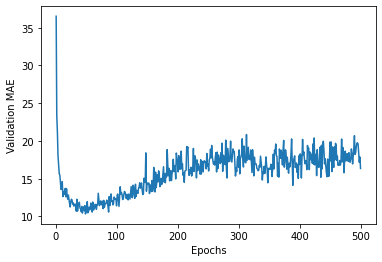

In [0]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


It may be a bit hard to see the plot due to scaling issues and relatively high variance. Let's:

* Omit the first 10 data points, which are on a different scale from the rest of the curve.
* Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.

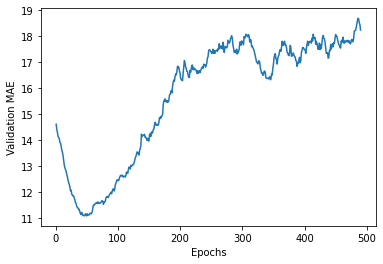

In [0]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


According to this plot, it seems that validation MAE stops improving significantly after 80 epochs. Past that point, we start overfitting.

Once we are done tuning other parameters of our model (besides the number of epochs, we could also adjust the size of the hidden layers), we 
can train a final "production" model on all of the training data, with the best parameters, then look at its performance on the test data:

In [0]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 43.4051 - mae: 2.6147


In [0]:
test_mae_score

2.6146552562713623

We are still off by about \$2,550.